In [107]:
import datetime as dt
import time
import random
from selenium import webdriver

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [106]:
from matplotlib import style
from mpl_finance import candlestick_ohlc
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [99]:
import pandas as pd
import pandas_datareader.data as web
import bs4 as bs
from bs4 import BeautifulSoup
import pickle
import requests
import fix_yahoo_finance as yf
yf.pdr_override() 
import os
import numpy as np

In [95]:
style.use('ggplot')
tickers=[]
name=[]

In [34]:
start= dt.datetime(2000,1,1)
end= dt.datetime(2018,2,28)
df = web.get_data_yahoo('MMM',start,end)

[*********************100%***********************]  1 of 1 downloaded


                Open      High       Low    Close  Adj Close   Volume
Date                                                                 
2000-01-03  48.03125  48.25000  47.03125  47.1875  30.435419  2173400
2000-01-04  46.43750  47.40625  45.31250  45.3125  29.226057  2713800
2000-01-05  45.56250  48.12500  45.56250  46.6250  30.072615  3699400
2000-01-06  47.15625  51.25000  47.15625  50.3750  32.491302  5975800
2000-01-07  50.56250  51.90625  49.96875  51.3750  33.136307  4101200


In [9]:
df = web.get_data_yahoo('GOOG', start, end)

ImmediateDeprecationError: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [11]:
df=web.DataReader("TSLA", 'google', start, end) 

/Users/yash/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [14]:
print(df.head())

             Open   High    Low  Close    Volume
Date                                            
2010-06-29  19.00  25.00  17.54  23.89  18783276
2010-06-30  25.79  30.42  23.30  23.83  17194394
2010-07-01  25.00  25.92  20.27  21.96   8229863
2010-07-02  23.00  23.10  18.71  19.20   5141807
2010-07-06  20.00  20.00  15.83  16.11   6879296


In [15]:
print(df.tail())

              Open    High     Low   Close   Volume
Date                                               
2018-02-22  335.53  347.44  334.75  346.17  6969808
2018-02-23  347.83  354.99  347.10  352.05  5817387
2018-02-26  353.50  359.00  352.36  357.42  4339985
2018-02-27  356.25  359.99  350.01  350.99  4797419
2018-02-28  352.57  355.24  342.22  343.06  6069658


In [ ]:
#df.to_csv("name.csv") - to convert the file to csv


In [18]:
df['100ma']= df['Close'].rolling(window=100,min_periods=0).mean()

In [19]:
print(df.head())


             Open   High    Low  Close    Volume      100ma
Date                                                       
2010-06-29  19.00  25.00  17.54  23.89  18783276  23.890000
2010-06-30  25.79  30.42  23.30  23.83  17194394  23.860000
2010-07-01  25.00  25.92  20.27  21.96   8229863  23.226667
2010-07-02  23.00  23.10  18.71  19.20   5141807  22.220000
2010-07-06  20.00  20.00  15.83  16.11   6879296  20.998000


In [12]:
df.to_csv('TSLA.csv')

In [13]:
df= pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
df['100ma']= df['Close'].rolling(window=100,min_periods=0).mean()

<BarContainer object of 1931 artists>

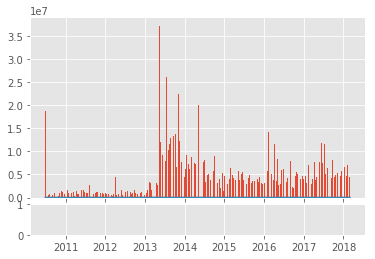

In [25]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5, colspan=1)
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1, colspan=1, sharex=ax1)
ax1.bar(df.index, df['Volume'])

In [34]:
df_ohlc= df['Close'].resample('10D').ohlc()
df_volume= df['Volume'].resample('10D').sum()
print(df_ohlc.head())

             open   high    low  close
Date                                  
2010-06-29  23.89  23.89  15.80  17.46
2010-07-09  17.40  20.64  17.05  20.64
2010-07-19  21.91  21.91  20.22  20.72
2010-07-29  20.35  21.95  19.59  19.59
2010-08-08  19.60  19.60  17.60  19.15


In [36]:
df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())

        Date   open   high    low  close
0 2010-06-29  23.89  23.89  15.80  17.46
1 2010-07-09  17.40  20.64  17.05  20.64
2 2010-07-19  21.91  21.91  20.22  20.72
3 2010-07-29  20.35  21.95  19.59  19.59
4 2010-08-08  19.60  19.60  17.60  19.15


In [40]:
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

In [41]:
ax1.xaxis_date()

In [51]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
plt.show()
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values,0)
plt.show()

In [60]:
def getdowtable():
   
    page = requests.get('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
    pagesoup = BeautifulSoup(page.text,'lxml')
    table = pagesoup.find("table",{"class":"wikitable sortable"})
    
#     print(table.findAll('tr')[1])
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[2].text
        name.append(row.findAll('td')[0].text)
        #print(name)

        mapping = str.maketrans(".","-")
        ticker = ticker.translate(mapping)
        tickers.append(ticker)
#         
    with open("DowJones.pickle","wb") as f:
        pickle.dump(tickers,f)
        pickle.dump(name,f)
        print(tickers)
        print(name)
        return (name,tickers)
getdowtable()     

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']
['3M', 'American Express', 'Apple', 'Boeing', 'Caterpillar', 'Chevron', 'Cisco Systems', 'Coca-Cola', 'DowDuPont', 'ExxonMobil', 'General Electric', 'Goldman Sachs', 'The Home

(['3M',
  'American Express',
  'Apple',
  'Boeing',
  'Caterpillar',
  'Chevron',
  'Cisco Systems',
  'Coca-Cola',
  'DowDuPont',
  'ExxonMobil',
  'General Electric',
  'Goldman Sachs',
  'The Home Depot',
  'IBM',
  'Intel',
  'Johnson & Johnson',
  'JPMorgan Chase',
  "McDonald's",
  'Merck',
  'Microsoft',
  'Nike',
  'Pfizer',
  'Procter & Gamble',
  'Travelers',
  'UnitedHealth Group',
  'United Technologies',
  'Verizon',
  'Visa',
  'Walmart',
  'Walt Disney'],
 ['MMM',
  'AXP',
  'AAPL',
  'BA',
  'CAT',
  'CVX',
  'CSCO',
  'KO',
  'DWDP',
  'XOM',
  'GE',
  'GS',
  'HD',
  'IBM',
  'INTC',
  'JNJ',
  'JPM',
  'MCD',
  'MRK',
  'MSFT',
  'NKE',
  'PFE',
  'PG',
  'TRV',
  'UNH',
  'UTX',
  'VZ',
  'V',
  'WMT',
  'DIS',
  'MMM',
  'AXP',
  'AAPL',
  'BA',
  'CAT',
  'CVX',
  'CSCO',
  'KO',
  'DWDP',
  'XOM',
  'GE',
  'GS',
  'HD',
  'IBM',
  'INTC',
  'JNJ',
  'JPM',
  'MCD',
  'MRK',
  'MSFT',
  'NKE',
  'PFE',
  'PG',
  'TRV',
  'UNH',
  'UTX',
  'VZ',
  'V',
  'WMT',
 

In [36]:
def getdatafromweb(reloaddb=False):
    if reloaddb:
        tickers=getdowtable() 
    else:
        with open("DowJones.pickle","rb") as f:
            tickers=pickle.load(f)
    start= dt.datetime(2000,1,1)
    end= dt.datetime(2018,2,28)
    
    if not os.path.exists('Stockdb'):
        os.makedirs('Stockdb')
    for ticker in tickers:
        if not os.path.exists('Stockdb/{}.csv'.format(ticker)):
            df = web.get_da\ta_yahoo(ticker, start, end)
            df.to_csv('Stockdb/{} .csv'.format(ticker))
        else:
            print("already have {}".format(ticker))
getdatafromweb()



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [69]:
# Base_url = "http://www.moneycontrol.com"
# companies={}
# # # Build a dictionary of companies and their abbreviated names 
# for x  in range(30):
#      companies[name[x]]=tickers[x]
# print(companies)
# # zipped= list(zip( tickers, name))
# # print(zipped)
# url_list = ['http://www.moneycontrol.com/company-article/{}/news/{}#{}'.format(k,v,v) for k,v in companies.items()]
# print (url_list)           
# # Create a list of the news section urls of the respective companies 
# # url_list = ['http://www.moneycontrol.com/company-article/{}/news/{}#{}'.format(k,v,v) for k,v in companies.iteritems()]
# # print url_list

{'3M': 'MMM', 'American Express': 'AXP', 'Apple': 'AAPL', 'Boeing': 'BA', 'Caterpillar': 'CAT', 'Chevron': 'CVX', 'Cisco Systems': 'CSCO', 'Coca-Cola': 'KO', 'DowDuPont': 'DWDP', 'ExxonMobil': 'XOM', 'General Electric': 'GE', 'Goldman Sachs': 'GS', 'The Home Depot': 'HD', 'IBM': 'IBM', 'Intel': 'INTC', 'Johnson & Johnson': 'JNJ', 'JPMorgan Chase': 'JPM', "McDonald's": 'MCD', 'Merck': 'MRK', 'Microsoft': 'MSFT', 'Nike': 'NKE', 'Pfizer': 'PFE', 'Procter & Gamble': 'PG', 'Travelers': 'TRV', 'UnitedHealth Group': 'UNH', 'United Technologies': 'UTX', 'Verizon': 'VZ', 'Visa': 'V', 'Walmart': 'WMT', 'Walt Disney': 'DIS'}
['http://www.moneycontrol.com/company-article/3M/news/MMM#MMM', 'http://www.moneycontrol.com/company-article/American Express/news/AXP#AXP', 'http://www.moneycontrol.com/company-article/Apple/news/AAPL#AAPL', 'http://www.moneycontrol.com/company-article/Boeing/news/BA#BA', 'http://www.moneycontrol.com/company-article/Caterpillar/news/CAT#CAT', 'http://www.moneycontrol.com/com

In [73]:
# List_of_links = []   

# # Extract the relevant news articles weblinks from the news section of selected companies
# for urls in url_list:
#     html = requests.get(urls)
#     soup = BeautifulSoup(html.text,'html.parser') # Create a BeautifulSoup object 

#    # Retrieve a list of all the links and the titles for the respective links
#     word1,word2,word3 = "US","USA","USFDA"
#     sub_links = soup.find_all('a', class_='arial11_summ')
#     for links in sub_links:
#         sp = BeautifulSoup(str(links),'html.parser')  # first convert into a string
#         tag = sp.a
#         if word1 in tag['title'] or word2 in tag['title'] or word3 in tag['title']:
#             category_links = Base_url + tag["href"]
#             List_of_links.append(category_links)
# #             time.sleep(3)
          
# # Print the select list of news articles weblinks    
# for p in List_of_links: 
#     print (p)


In [86]:
def compiledata():
    with open("DowJones.pickle","rb") as f:
    
        tickers = pickle.load(f)
    main_df= pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        try:
            df= pd.read_csv('Stockdb/{} .csv'.format(ticker))
            df.set_index('Date', inplace=True )
            df.rename(columns={'Adj Close': ticker}, inplace= True)
            df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
            if main_df.empty:
                main_df=df
            else:
                main_df=main_df.join(df,how='outer')
        
        except:
            print('stock_dfs/{}.csv'.format(ticker) + ' not found')

            
        if count%10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('Combined.csv')
compiledata()

0
10
20
stock_dfs/MMM.csv not found
30
stock_dfs/AXP.csv not found
stock_dfs/AAPL.csv not found
stock_dfs/BA.csv not found
stock_dfs/CAT.csv not found
stock_dfs/CVX.csv not found
stock_dfs/CSCO.csv not found
stock_dfs/KO.csv not found
stock_dfs/DWDP.csv not found
stock_dfs/XOM.csv not found
stock_dfs/GE.csv not found
40
stock_dfs/GS.csv not found
stock_dfs/HD.csv not found
stock_dfs/IBM.csv not found
stock_dfs/INTC.csv not found
stock_dfs/JNJ.csv not found
stock_dfs/JPM.csv not found
stock_dfs/MCD.csv not found
stock_dfs/MRK.csv not found
stock_dfs/MSFT.csv not found
stock_dfs/NKE.csv not found
50
stock_dfs/PFE.csv not found
stock_dfs/PG.csv not found
stock_dfs/TRV.csv not found
stock_dfs/UNH.csv not found
stock_dfs/UTX.csv not found
stock_dfs/VZ.csv not found
stock_dfs/V.csv not found
stock_dfs/WMT.csv not found
stock_dfs/DIS.csv not found
stock_dfs/MMM.csv not found
60
stock_dfs/AXP.csv not found
stock_dfs/AAPL.csv not found
stock_dfs/BA.csv not found
stock_dfs/CAT.csv not found
stoc

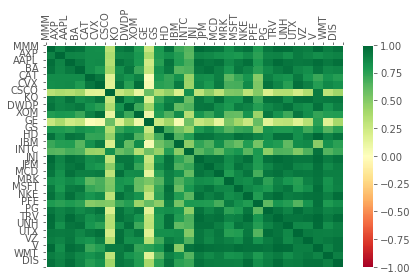

           MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
MMM   1.000000  0.883319  0.972821  0.949304  0.848173  0.840189  0.324819   
AXP   0.883319  1.000000  0.877080  0.873242  0.847926  0.851386  0.369042   
AAPL  0.972821  0.877080  1.000000  0.924973  0.846531  0.858919  0.349276   
BA    0.949304  0.873242  0.924973  1.000000  0.849611  0.786844  0.403479   
CAT   0.848173  0.847926  0.846531  0.849611  1.000000  0.935869  0.161885   

            KO      DWDP       XOM    ...          NKE       PFE        PG  \
MMM   0.918706  0.952672  0.776298    ...     0.957101  0.787536  0.931595   
AXP   0.869451  0.881685  0.799064    ...     0.854692  0.754790  0.876073   
AAPL  0.947936  0.902548  0.790567    ...     0.968502  0.788861  0.920001   
BA    0.837855  0.933314  0.718139    ...     0.878392  0.753415  0.854295   
CAT   0.872535  0.814655  0.884890    ...     0.807326  0.496022  0.896558   

           TRV       UNH       UTX        VZ         V       W

In [105]:
def visualize():
    df= pd.read_csv('Combined.csv')
    df_corr=df.corr()
    data=df_corr.values
    fig=plt.figure()
    ax= fig.add_subplot(1,1,1)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]+0.5))
    ax.set_yticks(np.arange(data.shape[1]+0.5))
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    column_labels= df_corr.columns
    row_labels = df_corr.index
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    print(df_corr.head())
visualize()   

In [108]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path=r'/Users/Downloads/chromedriver',chrome_options=chrome_options)


driver.get('https://query.nytimes.com/search/sitesearch/#/dow+jones/30days/')






def get_summary_data(soup):
    soup1 = soup
    Summary1 = []
    for p in soup.find_all('p'):
            Summary1.append(p.get_text())
            
    return Summary1

a = 0
b = []
for a in range (6):
    data_div = driver.find_element_by_id('searchResults')
    data_html = data_div.get_attribute('innerHTML')
    soup = BeautifulSoup(data_html, 'html5lib')
    b.append(get_summary_data(soup))
    Next_element = driver.find_element_by_class_name('next')
    Next_element.click()
    time.sleep(15)
    soup = None
    a = a+1
    

b.remove(b[1])

import pandas as pd
df = pd.DataFrame(b)

print(df)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [115]:
import string
from nltk.corpus import stopwords
from scipy.spatial import distance
import re, string
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
import nltk
from nltk.collocations import *
import csv

In [110]:
 stop_words = stopwords.words('english')

In [116]:
text=nltk.corpus.reuters.raw('test/14826')
tokens=nltk.word_tokenize(text.lower())
docs=[]
with open("/Users/yash/Downloads/news data.csv","r") as f:
    reader=csv.reader(f)
    for line in reader:
        docs.append(line[2])

['1', "Facebook plunged to its worst loss in four years Monday and led a rout in technology companies. The social media company's stock fell following reports that a data mining firm working for the Trump campaign improperly obtained data on 50 million F...", "To celebrate the bull market's ninth birthday on Friday, the three major U.S. stock indexes climbed almost 2 percent and the Nasdaq closed at a record high, as February's jobs report assuaged fears of inflation and aggressive interest rate hikes.", "Asian stock markets were mixed Monday following Wall Street's gain and China's appointment of a new central bank governor and other top economic officials.", '', 'The CNBC commentator, who would replace the former Wall Street executive Gary D. Cohn, said Mr. Trump “regards himself as a free trader.”']
